# Laboratorio 2.1: Clasificación

Bárbara Poblete, Felipe Bravo, Aymé Arango, Juglar Díaz, Hernán Sarmiento, Juan Pablo Silva

**Septiembre 2019**

## =================== INTEGRANTES =====================

Escriba a continuación el nombre de los integrantes del presente laboratorio:

1. 

2. 

## =====================================================

# Instrucciones


1. El formato de entrega es un documento en **.ipynb**, generado por jupyter.

2. Asegúrese que están los nombres de los integrantes. Sólo uno de los integrantes debe subir este archivo a U-Cursos antes de finalizar la sesión. 

3. Las respuestas a cada pregunta se deben escribir en los bloques que dicen **RESPUESTA A PREGUNTA X.X**.

# Del Laboratorio

En este laboratorio, primero vamos a hacer un análisis de datos y luego vamos a entrenar un clasificador de 3 maneras: 

* Entrenar/testear con los mismos datos,  

* Dividiendo el dataset en una parte para entrenar y otra para testear, y finalmente, 

* Usando cross-validation. Veremos accuracy, precision y recall para luego analizar los resultados. 


# Parte 1: Evaluar un clasificador

Usaremos el **Wine Dataset**, que viene en **scikit-learn**. Para ello, ejecutaremos la siguiente línea de código para cargar nuestro dataset.

In [1]:
from sklearn.datasets import load_wine

## PREGUNTA 1.1

Indique lo siguiente:
* Tamaño del dataset. 
* ¿Cuántas clases son?
* ¿Qué nombre tienen las clases?
* ¿Cuántas instancias hay de cada clase?

Indique en cada caso cómo obtuvo la respuesta, es decir, adjunte código.

### RESPUESTA A PREGUNTA 1.1
::
::


## Pregunta 1.2

Explique qué hacen las siguientes líneas de código. 

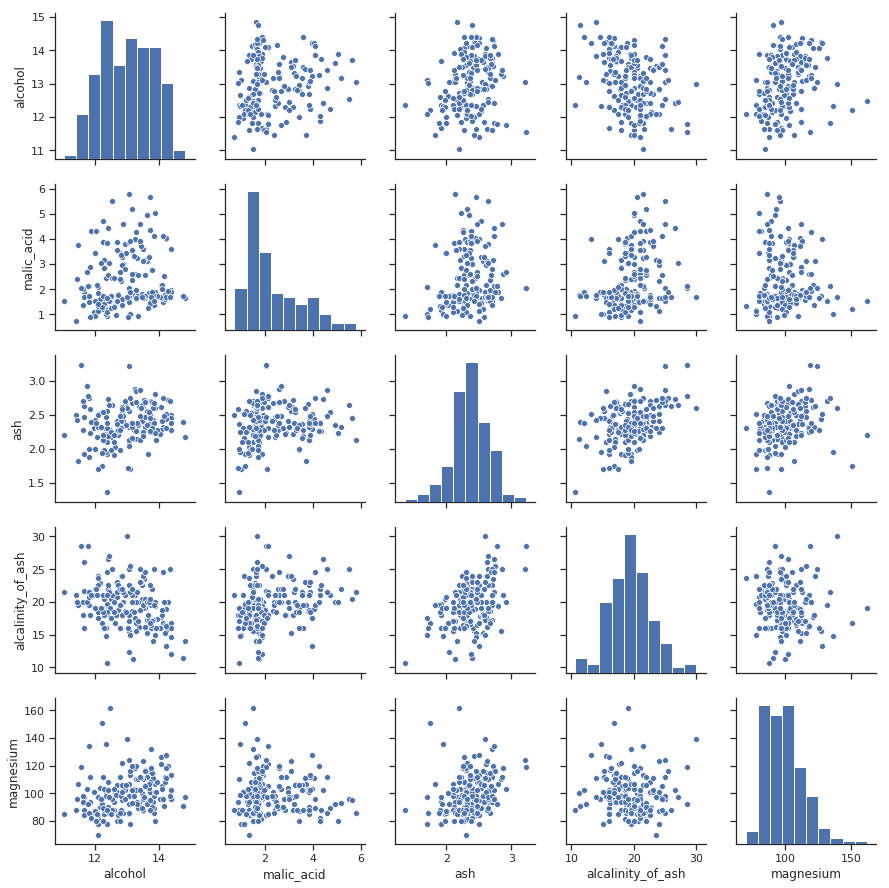

In [4]:
import matplotlib.pyplot as plt #carga pyplot desde matplotlib
import seaborn as sns; sns.set(style="ticks", color_codes=True) #carga seaborn
import pandas as pd #carga pandas

wine = load_wine() #carga los datos default de wine

features = pd.DataFrame(data=wine['data'],columns=wine['feature_names']) #crea el dataframe de los features en base a los datos de wine
data = features #asigna el df creado a la variable data
data['target']=wine['target'] # asgina la variable target dentro de data como los valores de la variable target dentro del df wine
data['class']=data['target'].map(lambda ind: wine['target_names'][ind]) # mapea el indicador de target_names de wine a la cariable class en el df data
                               

g = sns.pairplot(data.iloc[:, 0:5]) # Parametro kind="reg" agrega una recta, hace el plot de distribucion para las variables 0 a la 5 en el df data
plt.show() #muestra los plot creados con seaborn en la linea anterior


## RESPUESTA A PREGUNTA 1.2

::
::

## Pregunta 1.3 

¿Cuáles son las observaciones principales que puede obtener de la visualización? Explique. 

### RESPUESTA A PREGUNTA 1.3
::
::



# PARTE 2: Entrenar/testear con los mismos datos

Usaremos el clasificador **Decision Tree**, utilizando distintas formas de evaluación y vamos a compararlas mediante diversas métricas. 

## PREGUNTA 2.1

Usando el siguiente código, complete lo que falta para cargar los datos y entrenar el clasificador. Luego, muestre las métricas de accuracy, precision, recall y f1-score utilizando (X,y) como data y etiquetas respectivamente.

In [ ]:
## RESPUESTA PREGUNTA 2.1

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
X = wine.data      ## datos, caracteristicas o features de cada flor. 
y = wine.target    ## clase para cada instancia anterior.

# .... COMPLETE ACA


## Pregunta 2.2

De acuerdo a las métricas obtenidas ¿Es buena la predicción? ¿Recomendaria utilizar este clasificador en una aplicacion para clasificar vinos?

### RESPUESTA A PREGUNTA 2.2
::
::



::
::

# Parte 3: Otra variante: Dividiendo el dataset para entrenar y testear

Ahora lo que haremos será dividir nuestro dataset en 70% entrenar (***training set***) y 30% para testear (***testing set***). Use la función ***train_test_split()*** y utilice las variables `X_train, X_test, y_train, y_test`.

## Pregunta 3.1

Escriba el código necesario para entrenar el modelo e indique el Accuracy, Precision y Recall del clasificador. 
Entrene usando el ***training set*** y pruebe sobre el ***testing set***, en base a la división 70%-30%, respectivamente ¿En qué se diferencian los resultados con respecto a la pregunta 2.1? Cual es mejor? Cual usaria en una aplicacion para clasificar vinos?

**NOTA: para dividir el dataset use el parámetro `stratify=y`.**


In [ ]:
### RESPUESTA A PREGUNTA 3.1
# ...
# Recuerde usar las variables X_train, X_test, y_train, y_test



### RESPUESTA A PREGUNTA 3.1 Continuación




## Pregunta 3.2

El siguiente código muestra una funcion que genera una matriz de confusión de los resultados de clasificación de la pregunta 3.1. Ejecute el bloque y luego haga una llamada a la funcion *plot_confusion_matrix* con los resultados de la sección 3.1 para visualizar el gráfico. Interprete qué significa cada uno de los valores distintos de 0 en la matriz.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np

class_names = wine.target_names
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred) 
    
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
   
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

### RESPUESTA A PREGUNTA 3.2
::
::





# PARTE 4: Cross-validation

Con cross-validation, el conjunto de entrenamiento se divide en $k$ conjuntos disjuntos; se entrena sobre los datos correspondientes a $k-1$ de éstos, y se evalúa sobre el conjunto restante. Esto se repite $k$ veces, evaluando siempre sobre un conjunto distinto. Teniendo en cuenta el parámetro $k$, a éste método se le llama $k$-fold cross-validation.

El código que está a continuación realizará 10-fold cross-validation usando Decision Tree sobre los datos. La forma de estimar el rendimiento del clasificador es, entre otras formas, calculando el promedio de todos los k-folds.

Además se muestra la predición sobre los datos para testear. 

In [ ]:
## EJECUTAR ESTE BLOQUE

from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
cv_results = cross_validate(clf, X, y, cv = 10, scoring = scoring, return_train_score= True)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary:', np.mean(cv_results['test_accuracy']))

#Si quisieramos mostrar el resultado de cada k-fold, deberiamos quitar 
#la funcion np.mean para calcular el promedio. Esto mostraria una lista con el resultado de cada fold

## Pregunta 4.1

Comente el resultado obtenido y compare los valores de las métricas con respecto a lo obtenido en la pregunta 3.2 ¿Qué beneficios tiene emplear cross-validation?


### RESPUESTA PREGUNTA 4.1



# PARTE 5: FINAL

## Pregunta 5.1

Respecto a los 3 tipos de experimentos, ¿qué tipo de evaluación considera que es el mejor y por qué? (Refiérase a tamaño del dataset, distribución de clases, entre otras cosas.)


### RESPUESTA A PREGUNTA 5.1
::
::


## Pregunta 5.2

Entrene un clasificador empleando k-nearest neighbors (**KNN**) considerando 5 vecinos y cross validation de 10 folds. 

Compare el resultado de cross validation obtenido usando Decision Tree y KNN. ¿Hay algún efecto notorio en cuanto al desempeño de ambos clasificadores? ¿Se podría decir que uno es mejor que otro? Explique.

### RESPUESTA A PREGUNTA 5.2

In [ ]:
# Para cargar KNN
from sklearn.neighbors import KNeighborsClassifier
K = 5 # numero de vecinos
knn = KNeighborsClassifier(n_neighbors=K)  

## AGREGUE CODIGO PREGUNTA 5.2



### RESPUESTA A PREGUNTA 5.2 (EXPLICACION)


